Цель исследования: спарсить котировки с сайта Московской биржи: https://www.moex.com  
Программный интерфейс можно найти на: https://www.moex.com/a2193

In [1]:
# импортирем библиотеки
import requests
import pandas as pd
import numpy as np

Давайте посмотрим список бумаг, торгуемых на Московской бирже.
https://iss.moex.com/iss/reference/5

In [2]:
url_list = 'https://iss.moex.com/iss/securities.json?q=Сбербанк'
response_1 = requests.get(url_list)
response_1.json()

{'securities': {'metadata': {'id': {'type': 'int32'},
   'secid': {'type': 'string', 'bytes': 51, 'max_size': 0},
   'shortname': {'type': 'string', 'bytes': 189, 'max_size': 0},
   'regnumber': {'type': 'string', 'bytes': 189, 'max_size': 0},
   'name': {'type': 'string', 'bytes': 765, 'max_size': 0},
   'isin': {'type': 'string', 'bytes': 51, 'max_size': 0},
   'is_traded': {'type': 'int32'},
   'emitent_id': {'type': 'int32'},
   'emitent_title': {'type': 'string', 'bytes': 765, 'max_size': 0},
   'emitent_inn': {'type': 'string', 'bytes': 30, 'max_size': 0},
   'emitent_okpo': {'type': 'string', 'bytes': 24, 'max_size': 0},
   'gosreg': {'type': 'string', 'bytes': 189, 'max_size': 0},
   'type': {'type': 'string', 'bytes': 93, 'max_size': 0},
   'group': {'type': 'string', 'bytes': 93, 'max_size': 0},
   'primary_boardid': {'type': 'string', 'bytes': 12, 'max_size': 0},
   'marketprice_boardid': {'type': 'string', 'bytes': 12, 'max_size': 0}},
  'columns': ['id',
   'secid',
   'sh

In [3]:
response_1.json()['securities'].keys()

dict_keys(['metadata', 'columns', 'data'])

Получаем большой словарь с ключами ['metadata', 'columns', 'data']. Сделаем из него датафрейм.

In [4]:
dct_1 = response_1.json()['securities']
df_list = pd.DataFrame([{el : j[i] for i, el in enumerate(dct_1['columns'])} for j in dct_1['data']])
df_list

,id,secid,shortname,regnumber,name,isin,is_traded,emitent_id,emitent_title,emitent_inn,emitent_okpo,gosreg,type,group,primary_boardid,marketprice_boardid
0,423522893,FIXSBER,Фиксинг МосБиржи SBER,None,Фиксинг МосБиржи обыкновенных акций ПАО Сбербанк,None,1,NaN,None,None,None,None,stock_index_pf,stock_index,INPF,None
1,423522901,FIXSBERP,Фиксинг МосБиржи SBERP,None,Фиксинг МосБиржи привилегированных акций ПАО С...,None,1,NaN,None,None,None,None,stock_index_pf,stock_index,INPF,None
2,5443,SBER,Сбербанк,10301481B,Сбербанк России ПАО ао,RU0009029540,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,10301481B,common_share,stock_shares,TQBR,TQBR
3,5444,SBERP,Сбербанк-п,20301481B,Сбербанк России ПАО ап,RU0009029557,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,20301481B,preferred_share,stock_shares,TQBR,TQBR
4,420594117,RU000A103WV8,Сбер Sb33R,4B02-500-01481-B-001P,Сбербанк ПАО 001Р-SBER33,RU000A103WV8,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,4B02-500-01481-B-001P,exchange_bond,stock_bonds,TQCB,TQCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,215014649,RU000A101640,СберИОС181,4B0218601481B001P,СберИОС 001Р-181R 5Y SOFT 10%,RU000A101640,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,4B0218601481B001P,exchange_bond,stock_bonds,TQCB,TQCB
96,215014651,RU000A101657,СберИОС182,4B0218501481B001P,СберИОС 001Р-182R 5Y ИНДКС 50%,RU000A101657,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,4B0218501481B001P,exchange_bond,stock_bonds,TQCB,TQCB
97,239903689,RU000A1019T0,СберИОС192,4B0219501481B001P,СберИОС 001Р-192R 4.5Y O.G.90%,RU000A1019T0,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,4B0219501481B001P,exchange_bond,stock_bonds,TQCB,TQCB
98,246096353,RU000A101C14,СберИОС207,4B0221701481B001P,СберИОС 001Р-207R 5Y ИНДКС 50%,RU000A101C14,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,4B0221701481B001P,exchange_bond,stock_bonds,TQCB,TQCB


Как видим, наш датафрейм содержит 16 столбцов и 100 строк, т.е 100 инструементов от Сбербанка. Давайте попробуем найти в этом списке акции обыкновенные. Для этого посмотрим с столбец 'type' и найдем там 'common_share'. И в колонке 'secid' найдем тикер

In [5]:
df_list[df_list['type']=='common_share']

,id,secid,shortname,regnumber,name,isin,is_traded,emitent_id,emitent_title,emitent_inn,emitent_okpo,gosreg,type,group,primary_boardid,marketprice_boardid
2,5443,SBER,Сбербанк,10301481B,Сбербанк России ПАО ао,RU0009029540,1,1199.0,"Публичное акционерное общество ""Сбербанк России""",7707083893,00032537,10301481B,common_share,stock_shares,TQBR,TQBR


2. Посмотрим данные торгов по сберу за конкретную дату <br>
Информация: https://iss.moex.com/iss/reference/214

In [6]:
url_sber = 'https://iss.moex.com/iss/securities/SBER/aggregates.json'
params = {
    'date': '2024-04-22' # дата в формате Г:М:Д
    # по умолчанию: сегодняшнее число
}
response_2 = requests.get(url_sber, params)
response_2.json()

{'aggregates': {'metadata': {'market_name': {'type': 'string',
    'bytes': 45,
    'max_size': 0},
   'market_title': {'type': 'string', 'bytes': 765, 'max_size': 0},
   'engine': {'type': 'string', 'bytes': 45, 'max_size': 0},
   'tradedate': {'type': 'date', 'bytes': 10, 'max_size': 0},
   'secid': {'type': 'string', 'bytes': 36, 'max_size': 0},
   'value': {'type': 'double'},
   'volume': {'type': 'int64'},
   'numtrades': {'type': 'int64'},
   'updated_at': {'type': 'datetime', 'bytes': 19, 'max_size': 0}},
  'columns': ['market_name',
   'market_title',
   'engine',
   'tradedate',
   'secid',
   'value',
   'volume',
   'numtrades',
   'updated_at'],
  'data': [['shares',
    'Рынок акций',
    'stock',
    '2024-04-22',
    'SBER',
    21503391262.21,
    69006864,
    138707,
    '2024-04-23 00:09:02'],
   ['ndm',
    'Режим переговорных сделок',
    'stock',
    '2024-04-22',
    'SBER',
    330031046.94,
    1070848,
    537,
    '2024-04-23 00:09:02'],
   ['repo',
    'Рыно

In [7]:
dct_2 = response_2.json()['aggregates']
df_sber = pd.DataFrame([{el : j[i] for i, el in enumerate(dct_2['columns'])} for j in dct_2['data']])
df_sber

,market_name,market_title,engine,tradedate,secid,value,volume,numtrades,updated_at
0,shares,Рынок акций,stock,2024-04-22,SBER,2.150339e+10,69006864,138707,2024-04-23 00:09:02
1,ndm,Режим переговорных сделок,stock,2024-04-22,SBER,3.300310e+08,1070848,537,2024-04-23 00:09:02
2,repo,Рынок сделок РЕПО,stock,2024-04-22,SBER,4.016573e+10,143691831,10724,2024-04-23 00:09:02
3,moexboard,MOEX Board,stock,2024-04-22,SBER,0.000000e+00,0,0,2024-04-23 00:09:02


In [8]:
# можем определить цену акции в этот день
df_sber['price'] = df_sber['value']/df_sber['volume']
# посмотрим сколько стоила акция на торгах в этот день
df_sber[df_sber['market_name']=='shares']

,market_name,market_title,engine,tradedate,secid,value,volume,numtrades,updated_at,price
0,shares,Рынок акций,stock,2024-04-22,SBER,2.150339e+10,69006864,138707,2024-04-23 00:09:02,311.612353


3. Теперь посмотрим цену акции в заданном временном интервале


In [9]:
# engines/stock/ - фондовый рынок
# markets/shares/ - рынок акций
url = 'http://iss.moex.com/iss/engines/stock/markets/shares/securities/SBER/candles.json'

params = {
    'from': '2024-04-01',     # начало интервала
    'till': '2024-04-24',     # конец интервала
    'interval': '24'          # интервал торгов: 1m (1), 10m (10), 60m (60), 1d (24), 1w (7), 1m (31) или 1y (4)
}

response_3 = requests.get(url, params)
response_3.json()

{'candles': {'metadata': {'open': {'type': 'double'},
   'close': {'type': 'double'},
   'high': {'type': 'double'},
   'low': {'type': 'double'},
   'value': {'type': 'double'},
   'volume': {'type': 'double'},
   'begin': {'type': 'datetime', 'bytes': 19, 'max_size': 0},
   'end': {'type': 'datetime', 'bytes': 19, 'max_size': 0}},
  'columns': ['open',
   'close',
   'high',
   'low',
   'value',
   'volume',
   'begin',
   'end'],
  'data': [[300,
    300.43,
    301.65,
    299.5,
    8612449823.1,
    28662870,
    '2024-04-01 00:00:00',
    '2024-04-01 23:59:59'],
   [300.43,
    300.38,
    300.99,
    298.95,
    5995530685,
    19980460,
    '2024-04-02 00:00:00',
    '2024-04-02 23:59:59'],
   [300.4,
    306.72,
    307.13,
    300.17,
    17732924741.7,
    58228980,
    '2024-04-03 00:00:00',
    '2024-04-03 23:59:59'],
   [306.8,
    304.61,
    307.77,
    304.36,
    8884912105.9,
    29074900,
    '2024-04-04 00:00:00',
    '2024-04-04 23:59:59'],
   [304.62,
    306.1

In [10]:
dct_3 = response_3.json()['candles']
df = pd.DataFrame([{el : j[i] for i, el in enumerate(dct_3['columns'])} for j in dct_3['data']])
df

,open,close,high,low,value,volume,begin,end
0,300.00,300.43,301.65,299.50,8.612450e+09,28662870,2024-04-01 00:00:00,2024-04-01 23:59:59
1,300.43,300.38,300.99,298.95,5.995531e+09,19980460,2024-04-02 00:00:00,2024-04-02 23:59:59
2,300.40,306.72,307.13,300.17,1.773292e+10,58228980,2024-04-03 00:00:00,2024-04-03 23:59:59
3,306.80,304.61,307.77,304.36,8.884912e+09,29074900,2024-04-04 00:00:00,2024-04-04 23:59:59
4,304.62,306.10,306.50,303.70,5.915523e+09,19355990,2024-04-05 00:00:00,2024-04-05 23:59:59
5,306.50,307.75,308.60,306.22,7.656859e+09,24899610,2024-04-08 00:00:00,2024-04-08 23:59:59
6,308.10,306.76,309.35,305.51,9.857166e+09,32044440,2024-04-09 00:00:00,2024-04-09 23:59:59
7,306.76,306.48,307.14,304.62,6.331292e+09,20682180,2024-04-10 00:00:00,2024-04-10 23:59:59
8,306.70,306.95,308.00,305.70,6.298576e+09,20527000,2024-04-11 00:00:00,2024-04-11 23:59:59
9,307.40,307.10,307.87,306.30,4.920100e+09,16025300,2024-04-12 00:00:00,2024-04-12 23:59:59


Получаем таблицу котировок акций Сбера. В ней указана цена открытия торгов и закрытия, максимальная и минимальная цена за день и др

Чтобы визуально увидеть график цены, посмторим диаграмму

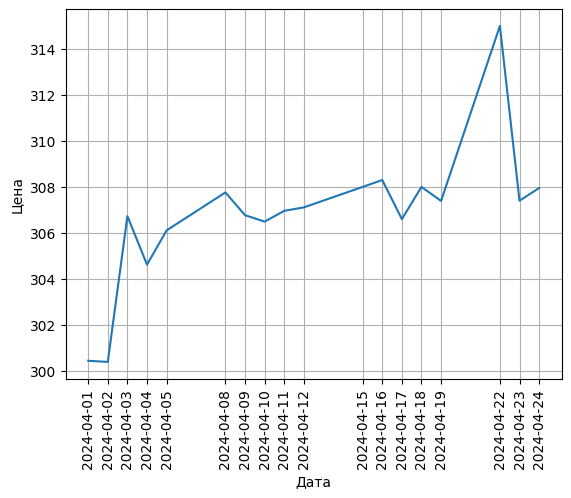

In [11]:
# импортируем библиотеку для построения графиков
from matplotlib import pyplot as plt
from datetime import datetime

x = pd.to_datetime(df['end']).dt.date
# для графика возьмем цену закрытия интервала
y = df['close']
plt.plot(x,y)
plt.xticks(x, rotation=90)
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

Вывод: Мы использовали лишь малую часть инструментов разработчика для парсинга данных с сайта Московской биржи. Но функционал понятен, буду использовать для своих целей в дальнейшем